In [1]:
import pandas as pd
from pandas import Series, DataFrame


In [2]:
#loading data
titanic_df = pd.read_csv('titanic.csv')


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [90]:
titanic_df.shape

(891, 16)

In [91]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### The .describe() method provides some basic statistical details and we can derive some interesting insights too. Going column by column:

The mean of the Survived column is at 0.38 which means that on average, more people died than survived.

The average age of the passengers were 29 and ranges from as young as an infant to an elderly aged 80 years old.


The count of the Age column is not in consistent with the rest of the columns which also states that there are null values which we should take note of.

#### Seaborn: 
It is a python library used to statistically visualize data. Seaborn, built over Matplotlib, provides a better interface and ease of usage. It can be installed using the following command, 
pip3 install seaborn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

######  Checking the NULL values 



In [6]:
titanic_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### The columns having null values are: Age, Cabin, Embarked. They need to be filled up with appropriate values later on.

Features: The titanic dataset has roughly the following types of features:

###### Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority. 
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)

###### Binary: A subtype of categorical features, where the variable has only two categories. 
Eg: Sex (Male/Female)

###### Ordinal: They are similar to categorical features but they have an order(i.e can be sorted). 
Eg. Pclass (1, 2, 3)


###### Continuous: They can take up any value between the minimum and maximum values in a column. 
Eg. Age, Fare


###### Count: They represent the count of a variable. 
Eg. SibSp, Parch


###### Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.

### Graphical Analysis

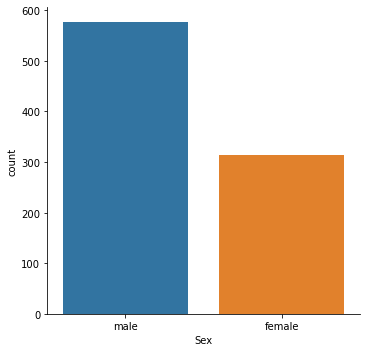

In [7]:
# A quick check on the gender
# Countplot
sns.catplot(x ="Sex", kind ="count", data = titanic_df)


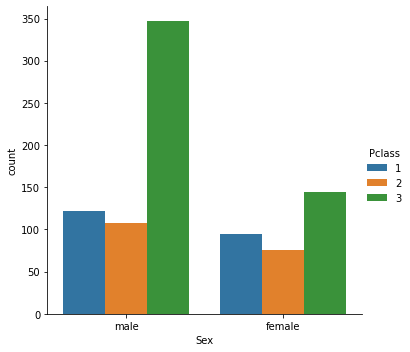

In [8]:
#Seperating the genders by classes
# Countplot
sns.catplot(x ="Sex", hue ="Pclass",
kind ="count", data = titanic_df)


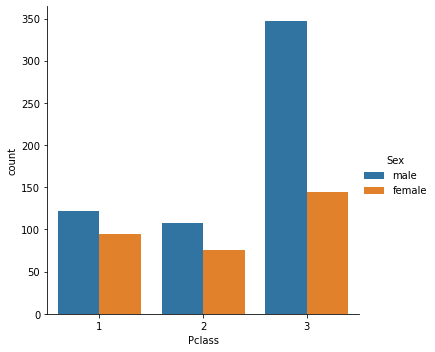

In [9]:
 sns.catplot(x ="Pclass", hue ="Sex",
kind ="count", data = titanic_df)


### Sex vs Survived 

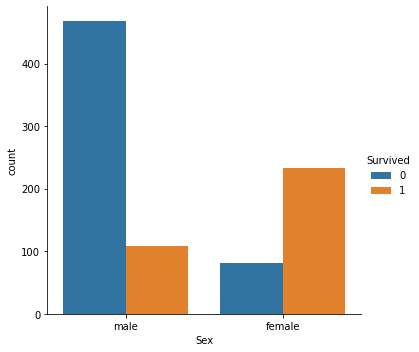

In [10]:
#Checking the survival rate btw both genders

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic_df)


#### Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. 

#####  Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

### Pclass (Ordinal Feature) vs Survived 

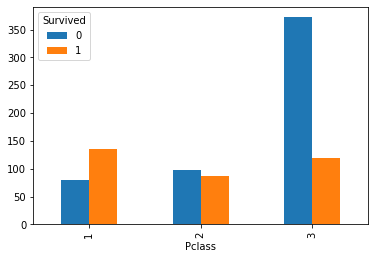

In [11]:
# Group the dataset by Pclass and Survived and then unstack them

group = titanic_df.groupby(['Pclass','Survived'])
pclass_survived = group.size().unstack().plot.bar()
pclass_survived
# Heatmap - Color encoded 2D representation of data.
#sns.heatmap(pclass_survived, annot = True, fmt ="d")

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. 

It implies that Pclass contributes a lot to a passenger’s survival rate.

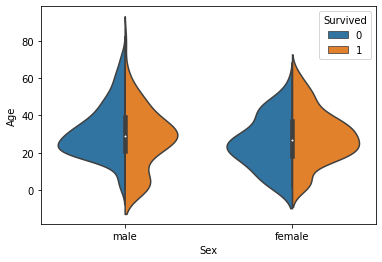

In [12]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic_df, split = True)

## This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  
Good for children.

High for women in the age range 20-50.


Less for men as the age increases.


Since Age column is important, the missing values need to be filled, either by using the Name column(ascertaining age based on salutation – Mr, Mrs etc.) or by using a regressor. 


After this step, another column – Age_Range (based on age column) can be created and the data can be analyzed again. 

#### Factor plot for Family_Size (Count Feature) and Family Size.  

In [13]:
# Adding a column Family_Size
titanic_df['Family_Size'] = 0
titanic_df['Family_Size'] = titanic_df['Parch'] + titanic_df['SibSp']

In [14]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [15]:
# Adding a column Alone
titanic_df['Alone'] = 0
titanic_df.loc[titanic_df.Family_Size == 0, 'Alone'] = 1

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


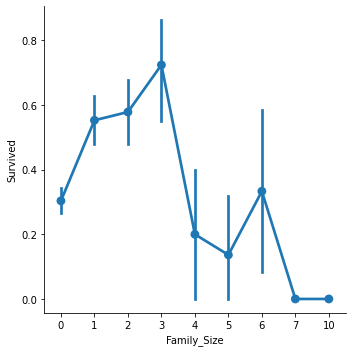

In [16]:
# Factorplot for Family_Size
sns.factorplot(x = 'Family_Size',y ='Survived', data = titanic_df)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


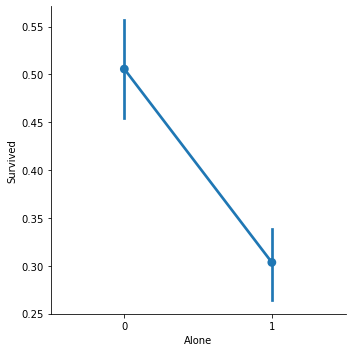

In [17]:
# Factorplot for Alone
sns.factorplot('Alone', y='Survived', data = titanic_df)

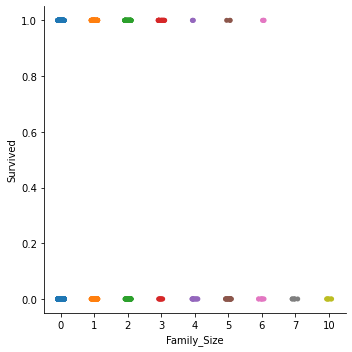

In [18]:
sns.catplot(x='Family_Size', y= 'Survived', data=titanic_df)

##### Family_Size denotes the number of people in a passenger’s family. 

##### It is calculated by summing the SibSp and Parch columns of a respective passenger.

##### Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

### Important observations – 

If a passenger is alone, the survival rate is less.


If the family size is greater than 5, chances of survival decrease considerably.

### Bar Plot for Fare (Continuous Feature) 

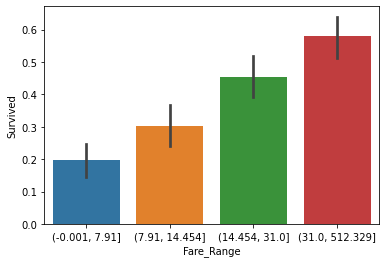

In [19]:
# Divide Fare into bins
titanic_df['Fare_Range'] = pd.qcut(titanic_df['Fare'],4)

# Barplot-Shows approximate values based on the height of bars.
sns.barplot(x='Fare_Range',y = 'Survived', data = titanic_df)

### Fare denotes the fare paid by a passenger . 
As the values in this column are continuous, they need to be put in the seperate bins(as done for ## Age feature) to get a clear idea.
                                                          It can be concluded that if a passenger paid a higher fare, the survival rate is more     
                                                        

#### Categorical Count Plots for Embarked Feature  

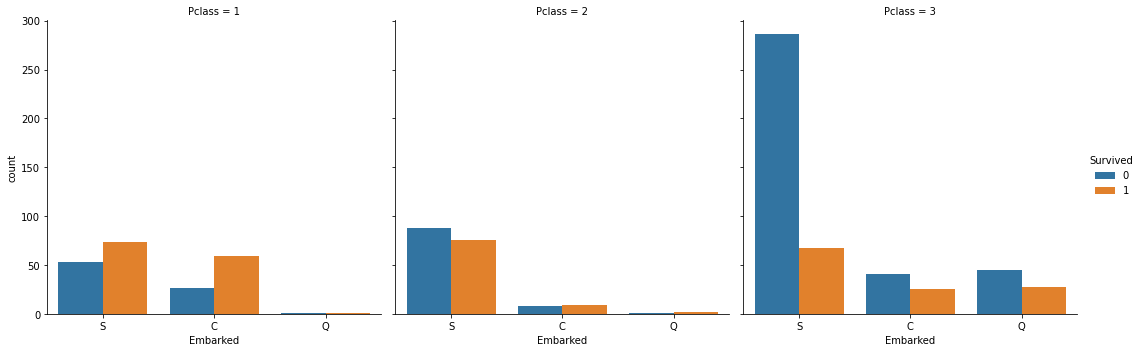

In [20]:
# Countplot
sns.catplot(x='Embarked', hue='Survived', kind='count', col = 'Pclass', data=titanic_df)

### Some notable observations are: 

Majority of the passengers boarded from S. So, the missing values can be filled with S.

Majority of class 3 passengers boarded from Q.

S looks lucky for class 1 and 2 passengers compared to class 3.

### Conclusion :  

#### The columns that can be dropped are: 
PassengerId, Name, Ticket, Cabin: 
    They are strings, cannot be categorized and don’t contribute much to the outcome. 

    Age, Fare: Instead, the respective range columns are retained.

    The titanic data can be analyzed using many more graph techniques and also more column correlations, than, as described in this article.
Once the EDA is completed, the resultant dataset can be used for predictions.

### ANOTHER APPROACH 

All good data analysis project begin with trying to answer questions.


1) Who were the passengers on the titanic? (Ages,Gender,Class,...etc)

2) What deck were the passengers on and how does that relate to their class?

3) Where did the passengers come from?

4) Who was alone and who was with family?

Then we'll dig deeper, with a broader question
5) What factor helped someone survive the sinking?

###### So we'll start with the first question: Who were the passengers on the titanic?

In [5]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16 :
        return 'child'
    else:
        return sex

In [6]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [7]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


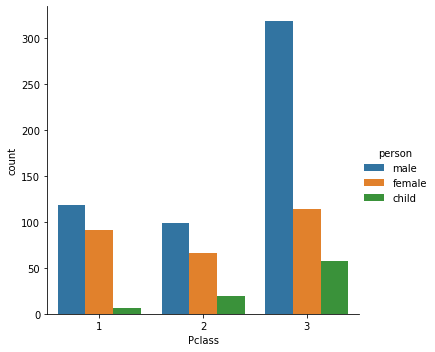

In [8]:
sns.catplot(x='Pclass',hue='person',data=titanic_df,kind='count')

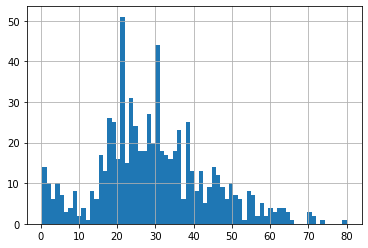

In [9]:
titanic_df['Age'].hist(bins=70)

In [10]:
titanic_df['Age'].mean()

29.69911764705882

In [11]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

#### Next, a histogram was plotted to understand the Age distribution of the passengers. We can see that a huge portion of the passengers were aged ranged from 20 to 40.

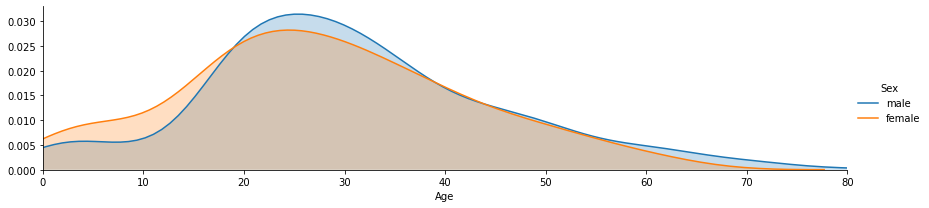

In [12]:
#FacetGrid allows you to do multiple plots on one figure
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

#### Lastly, a Kernel Density Estimate(KDE) Plot was plotted to show a curve of the distribution of Age within the 3 different Pclass. KDE plot helps to visualize distribution among large datasets and they show relative distribution, meaning the proportion of the dataset that amounts to a total of 1 or 100%.

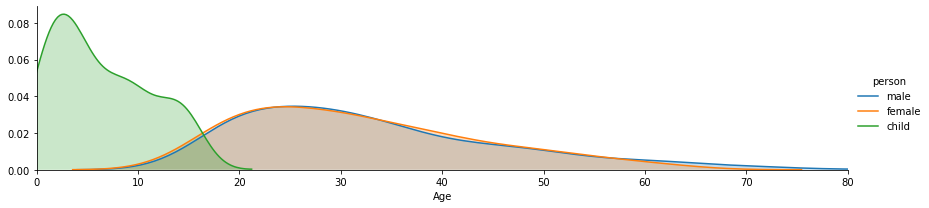

In [14]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

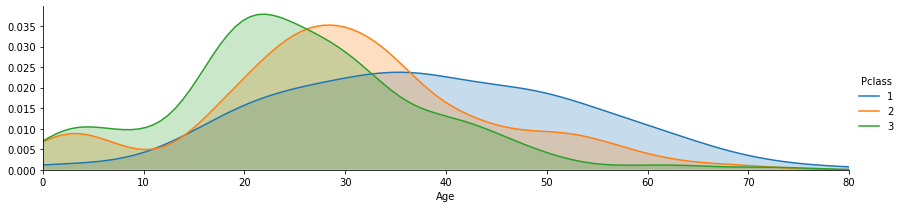

In [15]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


#### 2) What deck were the passengers on and how does that relate to their class?

### The first letter of the cabin represents which deck they are on and we are curious to know how the distribution is like within the decks.

In [17]:
# we check out the cabin since it has the information of the deck and we drop the null values
deck = titanic_df['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

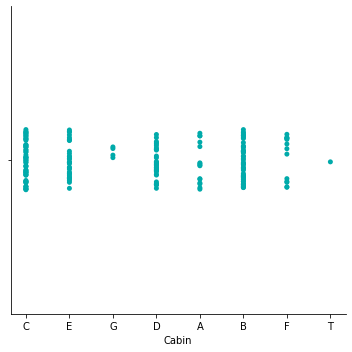

In [19]:
# we create an empty list that will accomodate only the first letter and leave the num
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin',data=cabin_df,palette='winter_d')

### I dropped the null values first and grab the first letter of the cabin through a for loop and store it inside a list. A new data frame was then created base on the list before I plotted it with a catplot and added a winter palette for an improved visual. We can see that most of the passengers were in cabin B and C and not many of them were staying in cabins F,G and T.

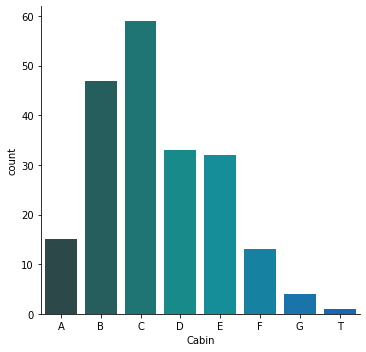

In [20]:
# let's grab that letter for the deck level with a simple for loop
levels = []
for level in deck:
    levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df.sort_values(by='Cabin', inplace=True)
sns.catplot('Cabin', data=cabin_df, kind='count', palette='winter_d')


#### Interesting to note we have a ‘T’ deck value there which doesn’t make sense, we can drop it out with the following code:

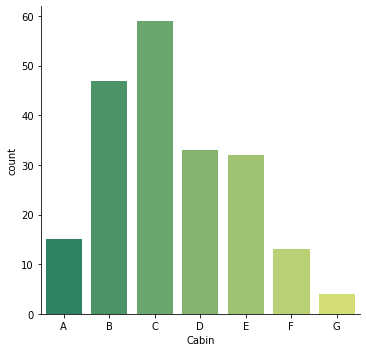

In [21]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot('Cabin', data=cabin_df,kind='count',palette='summer')

#### Great now that we’ve analyzed the distribution by decks, let’s go ahead and answer our third question.

#### 3) Where did the passengers come from?

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


###### Note here that the Embarked column has C, Q, and S values. Reading about the project on Kaggle you’ll note that these stand for Cherbourg, Queenstown, Southhampton.

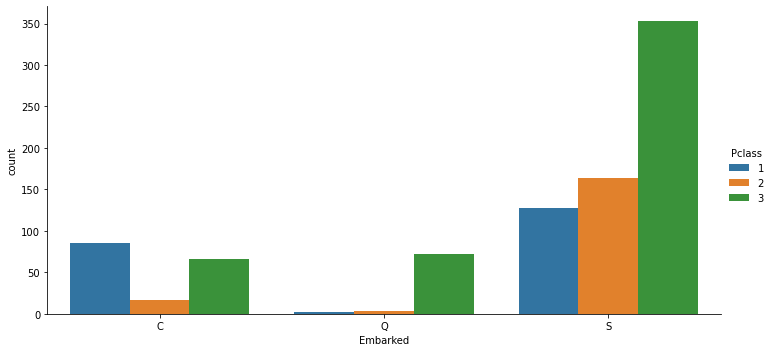

In [29]:
# to check out the result of where people came from and all the city that where embarked
# Now we can make a quick factorplot to check out the results, note the 
# order argument, used to deal with NaN values
# aspect regulates the size of the chart
sns.catplot(x='Embarked', hue='Pclass', kind='count', data=titanic_df, order=['C','Q','S'], aspect = 2)

#when using factorplot put in kind='count', 
# or you can using catplot with  kind='count'

###### An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be interesting to look at the economics of that town in that time period for further investigation.

#### 4) Who was alone and who was with family?

#### We want to find out which passengers came without any family members and who came with them. In the dataset, there is no column that specifies that and we can use the columns ‘SibSp’ and ‘Parch’ to help us answer this question.

#### To explain more, if either the ‘SibSp’ or ‘Parch’ column reflects a value more than 0, it means that the passenger came with either a sibling, spouse, parent or a child. This means the passenger came with a family member.


#### Similarly, if the both column reflects a value of 0, it means that the passenger came without a family member.

#### With that, we can come with a new column base on the value of 0 or more than 0 from the 2 columns.

In [30]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [31]:
# Let's start by adding a new column to define alone
# We'll add the parent/child column with the sibsp column

titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']
#Alternatively
#titanic_df['Alone'] = titanic_df['Alone'].SibSp + titanic_df['Alone'].Parch
#titanic_df.Alone

In [32]:
titanic_df['Alone'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

##### Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn’t alone. So let’s change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [33]:
# Look for > 0 or == 0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


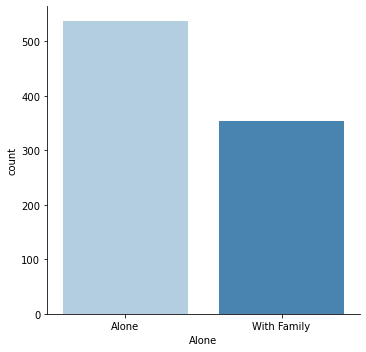

In [35]:




# Now let's get a simple visualization!
sns.factorplot('Alone',data=titanic_df,kind ='count', palette='Blues', order=['Alone','With Family'])

#### Great work! Now that we’ve thoroughly analyzed the data let’s go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

### 5. What factors helped someone survive the sinking?

#### What we have done so far was to understand the data and featured engineered the dataset to help us investigate on the Titanic dataset. Now, lets start to dive deeper and we want to gain more insights that regarding the survivability on the Titanic itself.

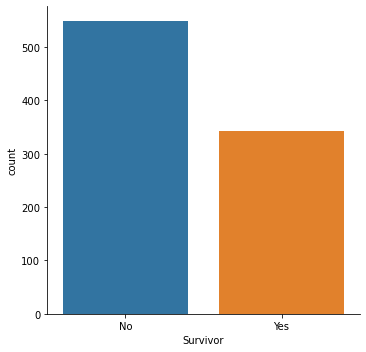

In [36]:
# Let's start by creating a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})

# Let's just get a quick overall view of survived vs died.

sns.catplot('Survivor',data=titanic_df,kind='count')

### So quite a few more people died than those who survived.

### Let’s see if the class of the passengers had an effect on their survival rate since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

### Survival of men and women

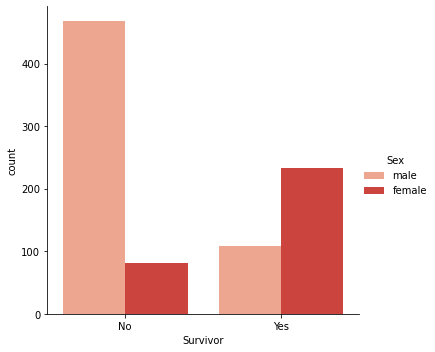

In [40]:
sns.factorplot('Survivor', data=titanic_df,kind='count' , hue='Sex',palette='Reds')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


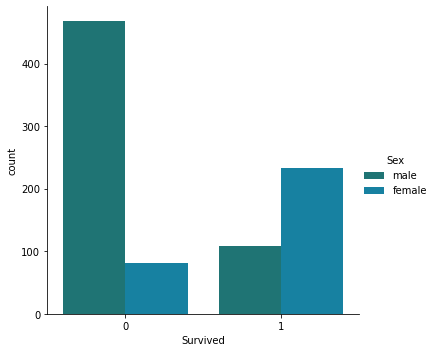

In [92]:
sns.factorplot('Survived', data=titanic_df,kind='count' , hue='Sex',palette='winter_d')

##### I made a normalized crosstab to show the breakdown of the gender against the survival rate. Amazingly, more than 80% of the male passengers died and more than 70% of the female passengers survived even though there are a lot more males as compared to females.

##### My thoughts? Gentleman, heroic, bravery and lastly, my respects to the males on board the Titanic!

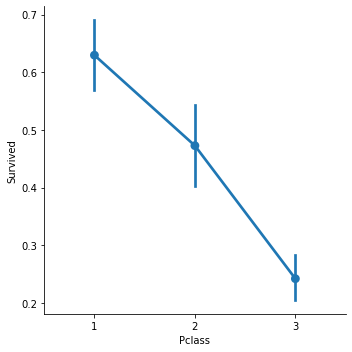

In [37]:
#sns.catplot('Survivor',data=titanic_df,'Pclass',kind='count')

# # Let's use a factor plot again, but now considering class

sns.catplot('Pclass','Survived', data=titanic_df, kind='point' )

#### Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by a large number of men in the 3rd class in combination with the women and children first policy. 

#### Let’s use ‘hue’ to get a clearer picture of this.

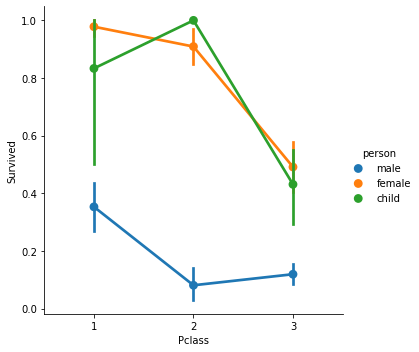

In [47]:
# Let's use a factor plot again, but now considering class and gender

sns.catplot('Pclass', 'Survived', data= titanic_df, hue='person',kind='point')

#### From this data, it looks like being a male or being in 3rd class was not favorable for survival. Even regardless of class, the result of being a male in any class dramatically decreases your chances of survival.

#### But what about age? Did being younger or older have an effect on the survival rate?

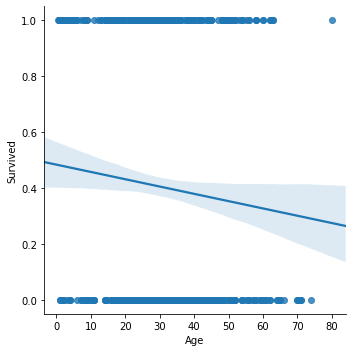

In [48]:
# Let's use a linear plot on age versus survival

sns.lmplot('Age','Survived', data=titanic_df)

### Looks like there is a general trend that the older the passenger was, the less likely they survived.

### Let’s go ahead and use hue to take a look at the effect of class and age.

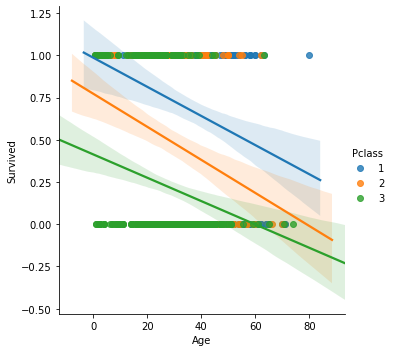

In [49]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)

### We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with an std attached!

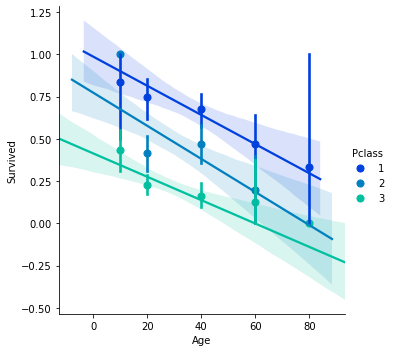

In [50]:
# Let's use a linear plot on age versus survival using hue for class seperation

generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

#### The next factor plot shows the data from the ‘Age’ and ‘Pclass’ column. Base on this factor plot, a passenger is more likely to survived at class 1 with age ranging from 10 to 20 years old.

### Interesting find on the older 1st class passengers! 

### What about if we relate to gender and age with the survival set?


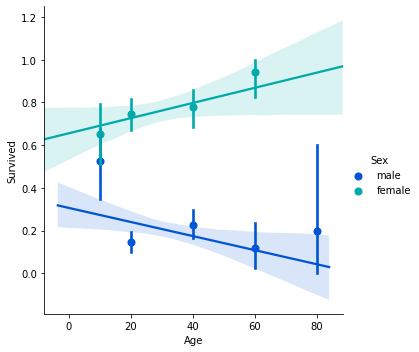

In [51]:
sns.lmplot('Age', 'Survived',hue='Sex', data=titanic_df, palette='winter',x_bins=generations)

##### Awesome! we’ve gotten some really great insights on how gender, age, and class all related to a passenger's chance of survival. 


##### Now you take control: Answer the following questions using pandas and seaborn:

#### 1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

#### 2.) Did having a family member increase the odds of surviving the crash?

###### 1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

In [69]:
# recall
#levels = []
#for level in deck:
   # levels.append(level[0])

#cabin_df = pd.DataFrame(levels)
#cabin_df.columns = ['Cabin']
#cabin_df.sort_values(by='Cabin', inplace=True)
#sns.catplot('Cabin', data=cabin_df, kind='count', palette='winter_d')

# concatinating the data frames

deck = []

for i in titanic_df['Cabin']:
    
    if str(i) == 'NaN':
        deck.append(0)
    else:
        deck.append(str(i)[0])
        
titanic_df['Deck'] = deck


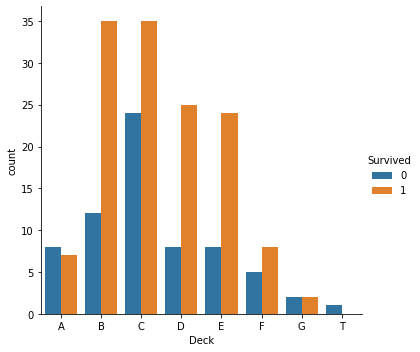

In [70]:
sns.catplot('Deck', hue ='Survived', data=titanic_df,kind='count',order=['A','B','C','D','E','F','G','T'])

#### From the data and visualization, the highest survival rate of about 75% were in decks B, D and E. 

#### Also, from the catplot, only deck A has more deaths to survivors as compared to all the other decks. This statement did not factor in deck T as it only has 1 passenger.

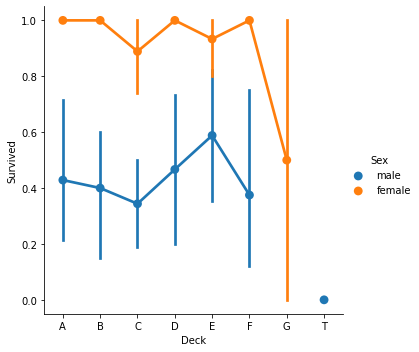

In [88]:
sns.catplot('Deck','Survived',hue='Sex',data=titanic_df,kind='point',order=['A','B','C','D','E','F','G','T'])

#### Lastly, the factor plot with the ‘Sex’ and ‘Deck’ column. After all the analysis, female passengers still stands on a higher survival rate as compared to the male regardless of which deck they are in.

#### 2.) Did having a family member increase the odds of surviving the crash?

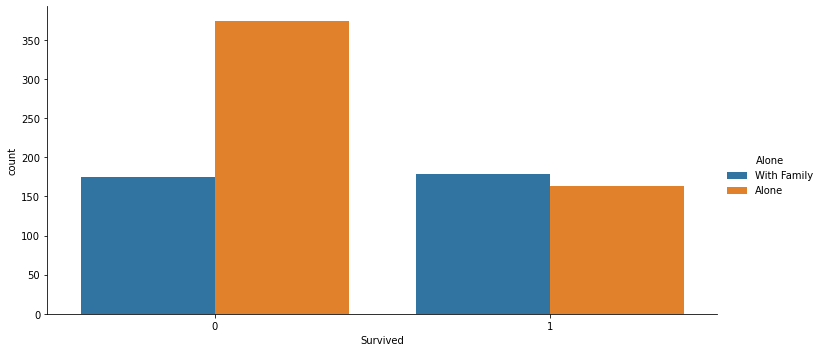

In [71]:
sns.catplot('Survived',hue='Alone',data=titanic_df, kind='count',aspect=2)
#  From the graphical representation having a family member increases the chances or likehood of survival

In [72]:
titanic_df['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

#####  Conclusion
We have done quite a bit here. From understanding the data to diving into a deeper analysis as to who is more likely to survived the Titanic crash.


Base on the analysis so far, these were the insights that we have gathered:


###### There were more male than female passengers onboard. Yet, more female passengers survived the crash.


###### A female passenger in her 20s female with a family staying in A or B and the passenger class of 1, has the highest chance to survive the crash.

###### A male passenger that came alone would most likely not survived the crash.

Having to write an article on the analysis helps me internalize the data even better and made me revisit the fundamentals of analysis from time to time. 

Typing out an article also helps me structure my thoughts and improve my report writing and storytelling skills which I believed are important skillsets to have in the field of data. 
I will continue to do more projects and upskill myself in the journey to be a data analyst.